In [22]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#more detailed
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans




spotify = pd.read_csv('playlist_dataset.csv', header=0)
spotify

,playlist_url,year,track_id,track_name,track_popularity,album,artist_id,artist_name,artist_genres,artist_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3AJwUDP919kvQ9QcozQPxg,Yellow,91,Parachutes,4gzpq5DPGxSnKTe4SA8HAU,Coldplay,"['permanent wave', 'pop']",86,...,-7.227,1.0,0.0281,0.00239,0.000121,0.2340,0.285,173.372,266773.0,4.0
1,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,2m1hi0nfMR9vdGC8UcrnwU,All The Small Things,84,Enema Of The State,6FBDaR13swtiWwGhX1WQsP,blink-182,"['alternative metal', 'modern rock', 'pop punk...",75,...,-4.918,1.0,0.0488,0.01030,0.000000,0.6120,0.684,148.726,167067.0,4.0
2,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,3y4LxiYMgDl4RethdzpmNe,Breathe,69,Breathe,25NQNriVT2YbSW80ILRWJa,Faith Hill,"['contemporary country', 'country', 'country d...",61,...,-9.007,1.0,0.0290,0.17300,0.000000,0.2510,0.278,136.859,250547.0,4.0
3,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,60a0Rd6pjrkxjPbaKzXjfq,In the End,88,Hybrid Theory (Bonus Edition),6XyY86QOPPrYVGvF9ch6wz,Linkin Park,"['alternative metal', 'nu metal', 'post-grunge...",83,...,-5.870,0.0,0.0584,0.00958,0.000000,0.2090,0.400,105.143,216880.0,4.0
4,https://open.spotify.com/playlist/37i9dQZF1DWU...,2000,62bOmKYxYg7dhrC6gH9vFn,Bye Bye Bye,74,No Strings Attached,6Ff53KvcvAj5U7Z1vojB5o,*NSYNC,"['boy band', 'dance pop', 'pop']",65,...,-4.843,0.0,0.0479,0.03100,0.001200,0.0821,0.861,172.638,200400.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,2g6tReTlM2Akp41g0HaeXN,Die Hard,79,Mr. Morale & The Big Steppers,2YZyLoL8N0Wb9xBt1NhZWg,Kendrick Lamar,"['conscious hip hop', 'hip hop', 'rap', 'west ...",86,...,-8.072,0.0,0.2470,0.31900,0.001160,0.1270,0.362,100.988,239027.0,4.0
2296,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,4pi1G1x8tl9VfdD9bL3maT,Big Energy,69,777,3MdXrJWsbVzdn6fe5JYkSQ,Latto,['trap queen'],85,...,-4.431,0.0,0.1150,0.04530,0.000000,0.3410,0.794,106.022,172540.0,4.0
2297,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3LtpKP5abr2qqjunvjlX5i,Doja,86,Doja,5H4yInM5zmHqpKIoMNAx4r,Central Cee,['melodic drill'],82,...,-7.430,1.0,0.2880,0.38000,0.000000,0.4030,0.972,140.040,97393.0,4.0
2298,https://open.spotify.com/playlist/56r5qRUv3jSx...,2022,3XOalgusokruzA5ZBA2Qcb,pushin P (feat. Young Thug),77,DS4EVER,2hlmm7s2ICUX0LVIhVFlZQ,Gunna,"['atl hip hop', 'melodic rap', 'rap', 'trap']",84,...,-4.572,0.0,0.1870,0.00783,0.006930,0.1290,0.488,77.502,136267.0,1.0


In [23]:
#spotify.info()
missing_data_col = spotify.isnull().apply(func=sum) #verif colonnes

missing_data_row=spotify[spotify.isnull().any(axis=1)]

missing_data_row
data_spotify=spotify.dropna()

In [25]:
#print(data_spotify.columns)
data_spotify['artist_name'].unique()

array(['Coldplay', 'blink-182', 'Faith Hill', 'Linkin Park', '*NSYNC',
       'Sisqo', 'Eminem', 'Robbie Williams', "Destiny's Child",
       'Red Hot Chili Peppers', '3 Doors Down', 'Dr. Dre', 'Modjo',
       'Alice Deejay', 'Limp Bizkit', "Gigi D'Agostino", 'Wheatus',
       'Backstreet Boys', 'JAY-Z', 'DMX', 'Darude', 'Craig David',
       'Lonestar', 'Nelly', 'The Corrs', 'Westlife', 'LeAnn Rimes',
       'Aaliyah', 'Toni Braxton', 'Britney Spears', 'Nine Days', 'Joe',
       'Baha Men', 'Tom Jones', 'Donell Jones', 'U2', 'Lee Ann Womack',
       'Third Eye Blind', 'Christina Aguilera', 'Sonique', 'Filter',
       'CÃ©line Dion', 'Mary Mary', 'Vertical Horizon', 'Fuel',
       'Vengaboys', 'Mariah Carey', 'Ronan Keating', 'Ricky Martin',
       'Melanie C', 'DJ Ã–tzi', 'Enrique Iglesias', 'Ruff Endz', 'P!nk',
       'GABRIELLE', 'Everclear', 'Marc Anthony', 'Erykah Badu',
       'Matchbox Twenty', 'Samantha Mumba', 'Toploader', 'Madison Avenue',
       'Jagged Edge', 'Next', 'MÃ½a'

<Axes: >

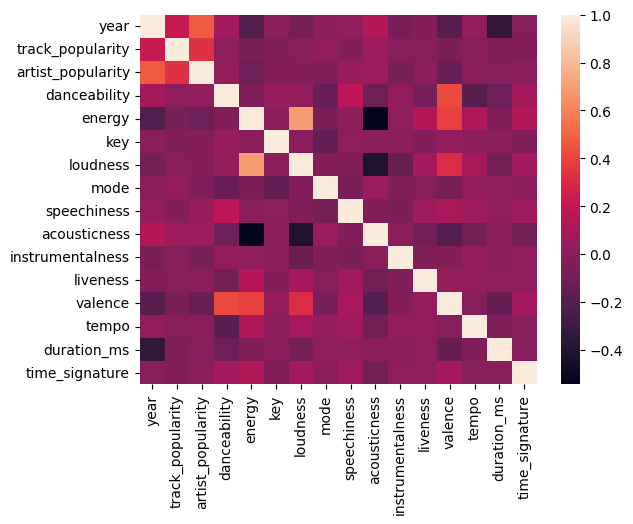

In [29]:
num_spotify=data_spotify.select_dtypes(include=[int,float])
corr=num_spotify.corr()
sns.heatmap(corr)